## Подготовка данных

In [68]:
from data_loading import *
import glob

In [69]:
# import tensorflow as tf
# gpu_fraction = 0.5
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [154]:
s = [print(x) for x in sorted(glob.glob("../results/cnn/*/*all_runs*100000*"), key = lambda x : x.split("/")[-1])]

../results/cnn/2019-04-27-17-33/cnn_model_1_all_runs_p1_ecoli_100000_10000_06_0.pyob
../results/cnn/2019-04-27-20-10/cnn_model_1_all_runs_p1_ecoli_100000_10000_12_0.pyob
../results/cnn/2019-04-27-22-52/cnn_model_1_all_runs_p1_ecoli_100000_10000_24_0.pyob
../results/cnn/2019-05-01-10-18/cnn_model_1_all_runs_p1_ecoli_100000_10000_50_0.pyob
../results/cnn/2019-04-29-07-41/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_01.pyob
../results/cnn/2019-04-29-09-55/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_02.pyob
../results/cnn/2019-04-29-00-29/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_03.pyob
../results/cnn/2019-04-29-02-25/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_06.pyob
../results/cnn/2019-04-29-04-14/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_12.pyob
../results/cnn/2019-04-29-05-49/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_50.pyob
../results/cnn/2019-04-25-10-58/cnn_model_1_all_runs_p2_ecoli_100000_10000_12_0.pyob
../results/cnn/2019-04-24-23-31/cnn_model_1_all_runs_p2_ecoli_100

In [9]:
# data = generate_data("../results/ecoli_10000_1000", 10, 0)[0]

# Статистика

In [45]:
# a = glob.glob("../results/cnn/*/*all_runs_p1*100000*")
# [print(x) for x in a]

# for path in a:
#     train, val, test = plot_hist(path, funcs = [plt.ylim(0.25, 0.34)])

In [46]:
# a = glob.glob("../results/cnn/*/*all_runs_p1*100000*6_*")
# [print(x) for x in a]

# for path in a:
#     train, val, test = plot_hist(path, funcs = [plt.ylim(0.25, 0.34)])

Простейшая сверточная модель с одним фильтром -- не учится
Берем с  тремя

# По кодонам с разной рамкой

In [125]:
from data_loading import *
data_list = generate_data("../results/ecoli_100000_10000", 50, 0)
data = data_list[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [130]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Input, MaxPooling1D, Concatenate, Lambda
from keras.callbacks import EarlyStopping
# from keras.backend import concatenate

def model_n(n, input_size):
    inp = Input(shape=(input_size, 4))
    x = Lambda(lambda x : x[:, n:, :])(inp)
#     print(x.shape)
    x = Conv1D(8, kernel_size=3, activation='relu', strides = 3)(x)
#     print(x.shape)
    x = Flatten()(x)
    x = Dense(10, activation='softmax')(x)
    
    model = Model(inp, x)
    
    return model

# model = model_n(3, 50)

In [131]:
def create_cnn_model_3(input_size = 50):
    z1 = model_n(0, input_size)
    z2 = model_n(1, input_size)
    z3 = model_n(2, input_size)
    
    x = keras.layers.concatenate([z1.output, z2.output, z3.output])
    x = Dense(4, activation='softmax')(x)
    
#     z1.input, z2.input, z3.input = inp, inp, inp

    model = Model([z1.input, z2.input, z3.input], x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_cnn_model_3(50)
# model.summary()

In [132]:
data.train1.shape, data.train_ans.shape

((100000, 50, 4), (100000, 4))

In [133]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)
history = model.fit([data.train1, data.train1, data.train1], data.train_ans, 
                    epochs=100,verbose = 1, callbacks = [es], 
                    validation_data = ([data.validate1, data.validate1, data.validate1], data.validate_ans))

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 62s 622us/step - loss: 1.3681 - acc: 0.3071 - val_loss: 1.3500 - val_acc: 0.3282
Epoch 2/100
100000/100000 [==============================] - 61s 607us/step - loss: 1.3490 - acc: 0.3359 - val_loss: 1.3447 - val_acc: 0.3382
Epoch 3/100
100000/100000 [==============================] - 57s 571us/step - loss: 1.3426 - acc: 0.3449 - val_loss: 1.3445 - val_acc: 0.3415
Epoch 4/100
100000/100000 [==============================] - 60s 595us/step - loss: 1.3392 - acc: 0.3497 - val_loss: 1.3415 - val_acc: 0.3418
Epoch 5/100
100000/100000 [==============================] - 60s 603us/step - loss: 1.3362 - acc: 0.3516 - val_loss: 1.3404 - val_acc: 0.3439
Epoch 6/100
100000/100000 [==============================] - 61s 606us/step - loss: 1.3338 - acc: 0.3548 - val_loss: 1.3393 - val_acc: 0.3458
Epoch 7/100
100000/100000 [==============================] - 64s 643us/step - loss: 1.3316 - acc:

In [135]:
model.evaluate([data.test1, data.test1, data.test1], data.test_ans)

10000/10000 [==============================] - 2s 219us/step


[1.3512953676223756, 0.3425]

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


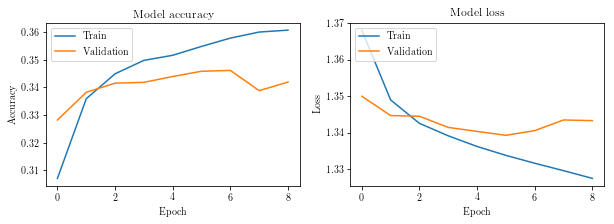

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history.history)

Модель пожирнее

In [138]:
def model_n(n, input_size):
    inp = Input(shape=(input_size, 4))
    x = Lambda(lambda x : x[:, n:, :])(inp)
#     print(x.shape)
    x = Conv1D(16, kernel_size=3, activation='relu', strides = 3)(x)
    x = Conv1D(8, kernel_size=3, activation='relu')(x)
#     print(x.shape)
    x = Flatten()(x)
    x = Dense(10, activation='softmax')(x)
    
    model = Model(inp, x)
    
    return model
def create_cnn_model_3(input_size = 50):
    z1 = model_n(0, input_size)
    z2 = model_n(1, input_size)
    z3 = model_n(2, input_size)
    
    x = keras.layers.concatenate([z1.output, z2.output, z3.output])
    x = Dense(4, activation='softmax')(x)
    
#     z1.input, z2.input, z3.input = inp, inp, inp

    model = Model([z1.input, z2.input, z3.input], x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_cnn_model_3(50)

es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)
history = model.fit([data.train1, data.train1, data.train1], data.train_ans, 
                    epochs=100,verbose = 1, callbacks = [es], 
                    validation_data = ([data.validate1, data.validate1, data.validate1], data.validate_ans))

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 108s 1ms/step - loss: 1.3714 - acc: 0.2971 - val_loss: 1.3543 - val_acc: 0.3274
Epoch 2/100
100000/100000 [==============================] - 104s 1ms/step - loss: 1.3524 - acc: 0.3295 - val_loss: 1.3456 - val_acc: 0.3323
Epoch 3/100
100000/100000 [==============================] - 105s 1ms/step - loss: 1.3471 - acc: 0.3371 - val_loss: 1.3415 - val_acc: 0.3397
Epoch 4/100
100000/100000 [==============================] - 105s 1ms/step - loss: 1.3435 - acc: 0.3430 - val_loss: 1.3419 - val_acc: 0.3381
Epoch 5/100
100000/100000 [==============================] - 106s 1ms/step - loss: 1.3392 - acc: 0.3498 - val_loss: 1.3443 - val_acc: 0.3389
Epoch 6/100
100000/100000 [==============================] - 105s 1ms/step - loss: 1.3364 - acc: 0.3526 - val_loss: 1.3397 - val_acc: 0.3447
Epoch 7/100
100000/100000 [==============================] - 102s 1ms/step - loss: 1.3339 - acc: 0.3553

In [139]:
model.evaluate([data.test1, data.test1, data.test1], data.test_ans)

10000/10000 [==============================] - 3s 279us/step


[1.3503364151000976, 0.3444]

In [5]:
from data_loading import *
data_list = generate_data("../results/ecoli_100000_10000", 50, 0, t = 1)
data = data_list[0]

0 

In [29]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Input, MaxPooling1D, Concatenate, Lambda
from keras.callbacks import EarlyStopping

def create_cnn_model_5(input_size = 10):
    inp = Input(shape=(input_size, 4))
    x = Conv1D(64, kernel_size= 3, activation='relu', padding = "same")(inp)
    x = MaxPooling1D(3)(x)
#     x = Conv1D(8, kernel_size= 3, activation='relu', padding = "same")(x)
    x = Flatten()(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inp, x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
model = create_cnn_model_5(50)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 50, 4)             0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 50, 64)            832       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 4100      
Total params: 4,932
Trainable params: 4,932
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=1)
history = model.fit(data.train1, data.train_ans, 
                    epochs=100,verbose = 1, callbacks = [es], 
                    validation_data = (data.validate1, data.validate_ans))

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
 62240/100000 [=================>............] - ETA: 16s - loss: 1.3859 - acc: 0.2702

# Статистика

In [72]:
import glob
a = [print(x) for x in sorted(glob.glob("../results/cnn/*/*all_runs*100000*"),key = lambda x : x.split("/")[-1])]


../results/cnn/2019-04-27-17-33/cnn_model_1_all_runs_p1_ecoli_100000_10000_06_0.pyob
../results/cnn/2019-04-27-20-10/cnn_model_1_all_runs_p1_ecoli_100000_10000_12_0.pyob
../results/cnn/2019-04-27-22-52/cnn_model_1_all_runs_p1_ecoli_100000_10000_24_0.pyob
../results/cnn/2019-05-01-10-18/cnn_model_1_all_runs_p1_ecoli_100000_10000_50_0.pyob
../results/cnn/2019-04-29-07-41/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_01.pyob
../results/cnn/2019-04-29-09-55/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_02.pyob
../results/cnn/2019-04-29-00-29/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_03.pyob
../results/cnn/2019-04-29-02-25/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_06.pyob
../results/cnn/2019-04-29-04-14/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_12.pyob
../results/cnn/2019-04-29-05-49/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_50.pyob
../results/cnn/2019-04-25-10-58/cnn_model_1_all_runs_p2_ecoli_100000_10000_12_0.pyob
../results/cnn/2019-04-24-23-31/cnn_model_1_all_runs_p2_ecoli_100

file ../results/cnn/2019-04-27-17-33/cnn_model_1_all_runs_p1_ecoli_100000_10000_06_0.pyob
file ../results/cnn/2019-04-29-07-41/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_01.pyob
file ../results/cnn/2019-04-29-09-55/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_02.pyob
file ../results/cnn/2019-04-29-00-29/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_03.pyob
file ../results/cnn/2019-04-29-02-25/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_06.pyob
file ../results/cnn/2019-04-29-04-14/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_12.pyob
file ../results/cnn/2019-04-29-05-49/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_50.pyob
30 30 30 30 30 30 30 

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


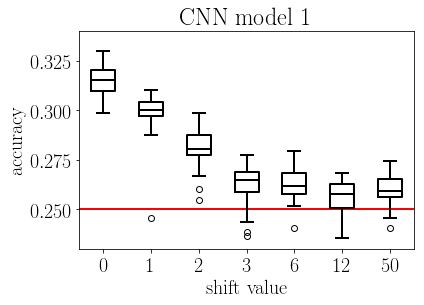

In [148]:
from data_loading import *
import matplotlib.pyplot as plt
%matplotlib inline

test_list = [test_accs(x) for x in sorted(glob.glob("../results/cnn/*/*1_all_runs_p1*100000*6_*"), key = lambda x : x.split("/")[-1])]

[print(len(x), end = " ") for x in test_list]

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'weight' : 200, 'size'   : 20})
# rc('font',**{'family':'serif','serif':['Times'], 'weight' : 700, 'size'   : 26})
rc('text', usetex=True)

plt.ylim(0.23, 0.34)
plt.hlines(0.25, 0, 8, color = 'red', linewidth = 2)
plt.boxplot(test_list,
            medianprops=dict(color="black", linewidth = 2),
            boxprops=dict(linewidth = 2),
            capprops=dict(linewidth = 2),
            whiskerprops=dict(linewidth = 2),)

plt.xticks(range(1,8), (0, 1, 2, 3, 6, 12, 50))
plt.ylabel("accuracy")
plt.xlabel("shift value")
plt.title("CNN model 1")
plt.savefig("../results/pics/cnn_model_1_all_runs_p1_ecoli_100000_10000_6_all.png", dpi=300, bbox_inches='tight')
plt.show()

file ../results/cnn/2019-04-27-17-33/cnn_model_1_all_runs_p1_ecoli_100000_10000_06_0.pyob
file ../results/cnn/2019-04-27-20-10/cnn_model_1_all_runs_p1_ecoli_100000_10000_12_0.pyob
file ../results/cnn/2019-04-27-22-52/cnn_model_1_all_runs_p1_ecoli_100000_10000_24_0.pyob
file ../results/cnn/2019-05-01-10-18/cnn_model_1_all_runs_p1_ecoli_100000_10000_50_0.pyob
30 30 30 30 

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


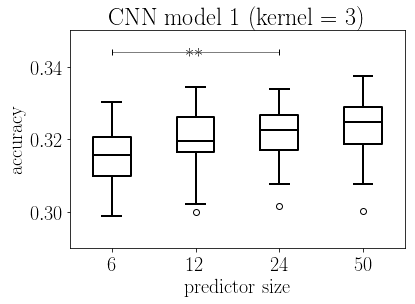

In [53]:
from data_loading import *
import matplotlib.pyplot as plt
%matplotlib inline

test_list = [test_accs(x) for x in sorted(glob.glob("../results/cnn/*/*1_all_runs_p1*100000*_0.*"), key = lambda x : x.split("/")[-1])]

[print(len(x), end = " ") for x in test_list]

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'weight' : 200, 'size'   : 20})
# rc('font',**{'family':'serif','serif':['Times'], 'weight' : 700, 'size'   : 26})
rc('text', usetex=True)

# plt.hlines(0.25, 0, 4, color = 'red', linewidth = 2)
plt.ylim(0.29, 0.35)
plt.boxplot(test_list,
            medianprops=dict(color="black", linewidth = 2),
            boxprops=dict(linewidth = 2),
            capprops=dict(linewidth = 2),
            whiskerprops=dict(linewidth = 2),)

plt.xticks(range(1,5), (6, 12, 24, 50))
plt.ylabel("accuracy")
plt.xlabel("predictor size")
plt.title("CNN model 1 (kernel = 3)")

plt.plot([1, 3], [0.344, 0.344], marker="|", linewidth = 0.5, color = "black")
plt.text(2-0.12, 0.343, "**")

plt.savefig("../results/pics/cnn_model_1_all_runs_p1_ecoli_100000_10000_all_0.png", dpi=300, bbox_inches='tight')
plt.show()

In [52]:
with open("../results/cnn/2019-04-27-17-33/cnn_model_1_all_runs_p1_ecoli_100000_10000_06_0.pyob", "rb") as file:
    test6, x = pickle.load(file)
with open("../results/cnn/2019-04-27-22-52/cnn_model_1_all_runs_p1_ecoli_100000_10000_24_0.pyob", "rb") as file:
    test24, x = pickle.load(file)  
with open("../results/cnn/2019-05-01-10-18/cnn_model_1_all_runs_p1_ecoli_100000_10000_50_0.pyob", "rb") as file:
    test50, x = pickle.load(file)  
    
print(scipy.stats.wilcoxon(test6, test24))
print(scipy.stats.mannwhitneyu(test6, test24))
print(scipy.stats.mannwhitneyu(test6, test50))

WilcoxonResult(statistic=116.0, pvalue=0.01656266342484228)
MannwhitneyuResult(statistic=275.5, pvalue=0.005045887446977393)
MannwhitneyuResult(statistic=229.0, pvalue=0.0005568613899056913)


file ../results/cnn/2019-05-01-17-07/cnn_model_2_all_runs_p1_ecoli_100000_10000_06_00.pyob
file ../results/cnn/2019-05-01-18-30/cnn_model_2_all_runs_p1_ecoli_100000_10000_12_00.pyob
file ../results/cnn/2019-05-01-20-40/cnn_model_2_all_runs_p1_ecoli_100000_10000_24_00.pyob
file ../results/cnn/2019-05-01-23-06/cnn_model_2_all_runs_p1_ecoli_100000_10000_50_00.pyob
30 30 30 30 

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


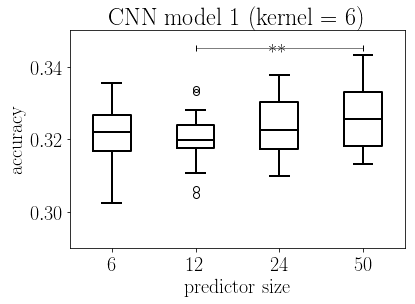

In [84]:
from data_loading import *
import matplotlib.pyplot as plt
%matplotlib inline

test_list = [test_accs(x) for x in sorted(glob.glob("../results/cnn/*/*2_all_runs_p1*100000*_00.*"), key = lambda x : x.split("/")[-1])]

[print(len(x), end = " ") for x in test_list]

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'weight' : 200, 'size'   : 20})
# rc('font',**{'family':'serif','serif':['Times'], 'weight' : 700, 'size'   : 26})
rc('text', usetex=True)

# plt.hlines(0.25, 0, 4, color = 'red', linewidth = 2)
plt.ylim(0.29, 0.35)
plt.boxplot(test_list,
            medianprops=dict(color="black", linewidth = 2),
            boxprops=dict(linewidth = 2),
            capprops=dict(linewidth = 2),
            whiskerprops=dict(linewidth = 2),)

plt.xticks(range(1,5), (6, 12, 24, 50))
plt.ylabel("accuracy")
plt.xlabel("predictor size")
plt.title("CNN model 1 (kernel = 6)")

plt.plot([2, 4], [0.345, 0.345], marker="|", linewidth = 0.5, color = "black")
plt.text(3-0.12, 0.344, "**")

# plt.plot([1, 4], [0.345, 0.345], marker="|", linewidth = 0.5, color = "black")
# plt.text(2.5-0.12, 0.344, "ns")

plt.savefig("../results/pics/cnn_model_2_all_runs_p1_ecoli_100000_10000_all_0.png", dpi=300, bbox_inches='tight')
plt.show()

In [93]:
test6  = test_accs("../results/cnn/2019-05-01-17-07/cnn_model_2_all_runs_p1_ecoli_100000_10000_06_00.pyob")
test12 = test_accs("../results/cnn/2019-05-01-18-30/cnn_model_2_all_runs_p1_ecoli_100000_10000_12_00.pyob") 
test24 = test_accs("../results/cnn/2019-05-01-20-40/cnn_model_2_all_runs_p1_ecoli_100000_10000_24_00.pyob")
test50 = test_accs("../results/cnn/2019-05-01-23-06/cnn_model_2_all_runs_p1_ecoli_100000_10000_50_00.pyob") 
  

print(scipy.stats.wilcoxon(test6, test24))
print(scipy.stats.mannwhitneyu(test6, test24))
print(scipy.stats.mannwhitneyu(test12, test50))
print(scipy.stats.mannwhitneyu(test6, test50))

file ../results/cnn/2019-05-01-17-07/cnn_model_2_all_runs_p1_ecoli_100000_10000_06_00.pyob
file ../results/cnn/2019-05-01-18-30/cnn_model_2_all_runs_p1_ecoli_100000_10000_12_00.pyob
file ../results/cnn/2019-05-01-20-40/cnn_model_2_all_runs_p1_ecoli_100000_10000_24_00.pyob
file ../results/cnn/2019-05-01-23-06/cnn_model_2_all_runs_p1_ecoli_100000_10000_50_00.pyob
WilcoxonResult(statistic=175.5, pvalue=0.2409637184701241)
MannwhitneyuResult(statistic=405.5, pvalue=0.25767114472326813)
MannwhitneyuResult(statistic=307.0, pvalue=0.017563223676702492)
MannwhitneyuResult(statistic=350.0, pvalue=0.07061940962521014)


## Отступ

In [65]:
# import os
# os.rename("../results/cnn/2019-05-01-10-18/cnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob",
#          "../results/cnn/2019-05-01-10-18/cnn_model_1_all_runs_p1_ecoli_100000_10000_50_0.pyob")

In [33]:
# from data_loading import *
# import matplotlib.pyplot as plt
# %matplotlib inline

# test_list = [test_accs(x) for x in sorted(glob.glob("../results/cnn/*/*2_all_runs_*100000**"), key = lambda x : x.split("/")[-1])]

# [print(len(x), end = " ") for x in test_list]

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'weight' : 200, 'size'   : 20})
# # rc('font',**{'family':'serif','serif':['Times'], 'weight' : 700, 'size'   : 26})
# rc('text', usetex=True)

# # plt.hlines(0.25, 0, 4, color = 'red', linewidth = 2)
# # plt.ylim(0.29, 0.35)
# plt.boxplot(test_list,
#             medianprops=dict(color="black", linewidth = 2),
#             boxprops=dict(linewidth = 2),
#             capprops=dict(linewidth = 2),
#             whiskerprops=dict(linewidth = 2),)

# plt.xticks(range(1,5), (6, 12, 24, 50))
# plt.ylabel("accuracy")
# # plt.xlabel("predictor size")
# # plt.title("CNN model 1")
# # plt.savefig("../results/pics/cnn_model_1_all_runs_p1_ecoli_100000_10000_all_0.png", dpi=300, bbox_inches='tight')
# plt.show()

In [153]:
from cnn_models import *
model = create_cnn_model_4(100)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 100, 4)            0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 98, 6)             78        
_________________________________________________________________
flatten_37 (Flatten)         (None, 588)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 2356      
Total params: 2,434
Trainable params: 2,434
Non-trainable params: 0
_________________________________________________________________


# Сравнение моделей

file ../results/cnn/2019-04-27-20-10/cnn_model_1_all_runs_p1_ecoli_100000_10000_12_0.pyob
file ../results/cnn/2019-05-01-18-30/cnn_model_2_all_runs_p1_ecoli_100000_10000_12_00.pyob
file ../results/cnn/2019-05-16-23-06/cnn_model_4_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
file ../results/cnn/2019-05-17-20-34/cnn_model_5_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
file ../results/cnn/2019-05-17-00-41/cnn_model_3_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
file ../results/cnn/2019-05-17-11-15/cnn_model_3_all_runs_p2_ecoli_100000_10000_51_00_cds_False.pyob
30 30 30 30 30 30 

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


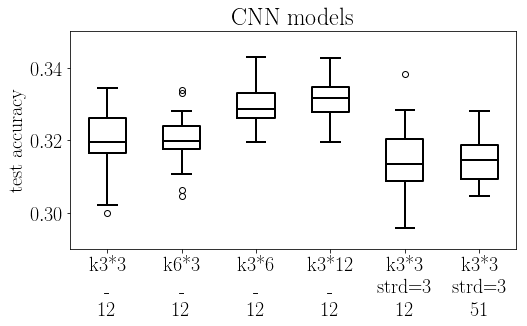

In [149]:
from data_loading import *
import matplotlib.pyplot as plt
%matplotlib inline

files = sorted(glob.glob("../results/cnn/*/*[1,2,4,5]_all_runs_p1*100000*12_*.*"), key = lambda x : x.split("/")[-1])
files += sorted(glob.glob("../results/cnn/*/*3_all_runs_p*100000**"), key = lambda x : x.split("/")[-1])

test_list = [test_accs(x) for x in files]

[print(len(x), end = " ") for x in test_list]
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'weight' : 200, 'size'   : 20})
# rc('font',**{'family':'serif','serif':['Times'], 'weight' : 700, 'size'   : 26})
rc('text', usetex=True)

# plt.hlines(0.25, 0, 4, color = 'red', linewidth = 2)
# print(plt.rcParams.get('figure.figsize'))
plt.figure(figsize=(8,4))
plt.ylim(0.29, 0.35)
plt.boxplot(test_list,
            medianprops=dict(color="black", linewidth = 2),
            boxprops=dict(linewidth = 2),
            capprops=dict(linewidth = 2),
            whiskerprops=dict(linewidth = 2),)

plt.xticks(range(1,7), [
        "k3*3\n-\n 12", "k6*3 \n-\n 12", "k3*6 \n-\n 12",  "k3*12 \n-\n 12", "k3*3\n strd=3 \n 12",  "k3*3\n strd=3 \n 51" ], 
#   rotation = 'vertical' 
          )

plt.ylabel("test accuracy")
# plt.xlabel("model")
plt.title("CNN models")

# plt.plot([1, 3], [0.344, 0.344], marker="|", linewidth = 0.5, color = "black")
# plt.text(2-0.12, 0.343, "ns")


plt.savefig("../results/pics/cnn_models_all_runs_p1_ecoli_100000_10000_all_0.png", dpi=300, bbox_inches='tight')
plt.show()

# Автоэнкодер

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, Input, concatenate
from keras import backend as K
from keras.models import Model

In [ ]:
x0 = Input(shape=(length,4))
x1 = Conv1D(16, (4), activation='relu', padding='same')(x0)
x1 = MaxPooling1D((2), padding='same')(x1) # x1 (64, 64, 16)

# x2 = Conv2D(8, (4, 4), activation='relu', padding='same')(x1)
# x2 = MaxPooling2D((2, 2), padding='same')(x2) # x2 (32, 32, 8)

# # x3 = Conv2D(8, (4, 4), activation='relu', padding='same')(x2)
# # x3 = MaxPooling2D((2, 2), padding='same')(x3) #x3 (16, 16, 8)

# # # at this point the representation is (4, 4, 8) i.e. 128-dimensional


# # x97 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
# # x97 = UpSampling2D((2, 2))(x97) #x97 (32, 32, 8)

# x98 = Conv2D(8, (3, 3), activation='relu', padding='same')(concatenate([x97, x2]))
# x98 = UpSampling2D((2, 2))(x98) # x98 (64, 64, 8)

# x99 = Conv1D(16, (3), activation='relu', padding = "same")(concatenate([x98, x1]))
x99 = Conv1D(16, (3), activation='relu', padding = "same")(x1)
x99 = UpSampling1D((2))(x99) #x99 (128, 128, 16)

decoded = Conv1D(4, (3), activation='softmax', padding='same')(x99)


model = Model(x0, decoded)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=1)
    history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans))